In [1]:
#a set of kernels to achieve a combination of effects

In [19]:
import cv2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [32]:
def load_img():
    img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img,'ABCDE',org=(50,300),fontFace=font,fontScale=5,color=(255,255,255),thickness=25)
    return img

In [33]:
#do a good size plot
def show_pic(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

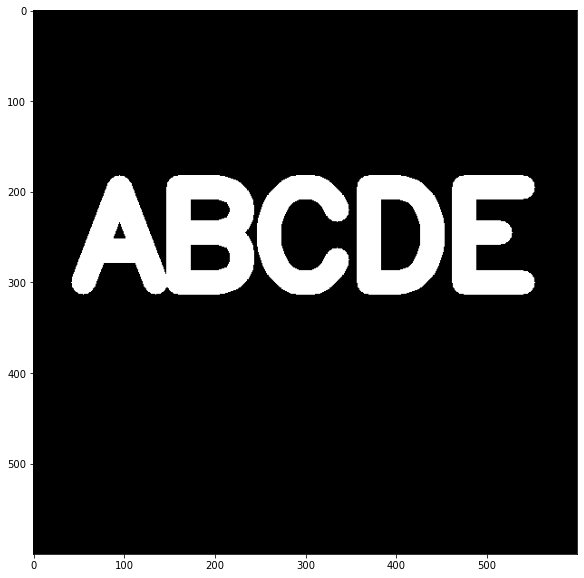

In [40]:
img = load_img()
show_pic(img)

In [41]:
#errosion removes. boundaries 
kernel = np.ones((5,5),dtype=np.uint8)

In [42]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [43]:
result = cv2.erode(img,kernel,iterations=4)

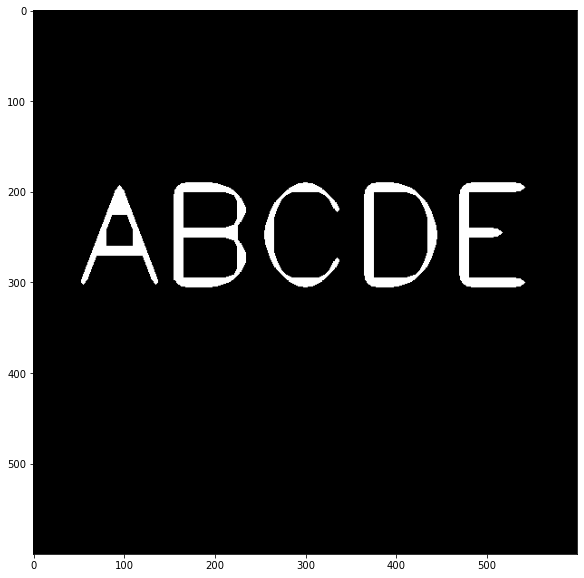

In [44]:
show_pic(result)

In [45]:
#create white noise and add on to the img
img = load_img()


In [47]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

In [48]:
white_noise

array([[1, 1, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 0, 1]])

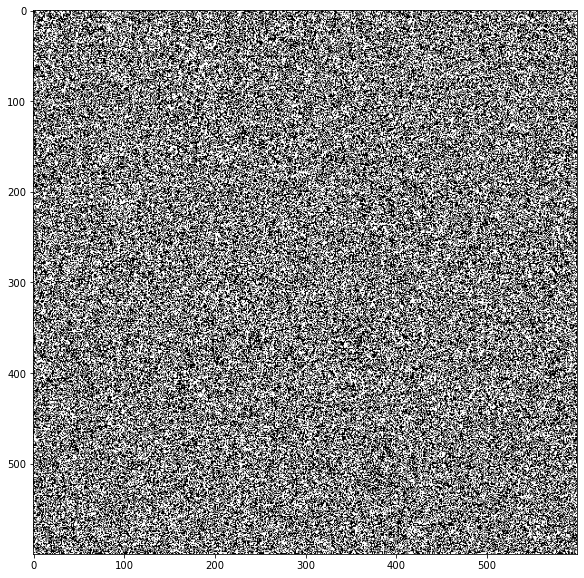

In [49]:
show_pic(white_noise)

In [50]:
img.max()

255.0

In [51]:
white_noise = white_noise*255

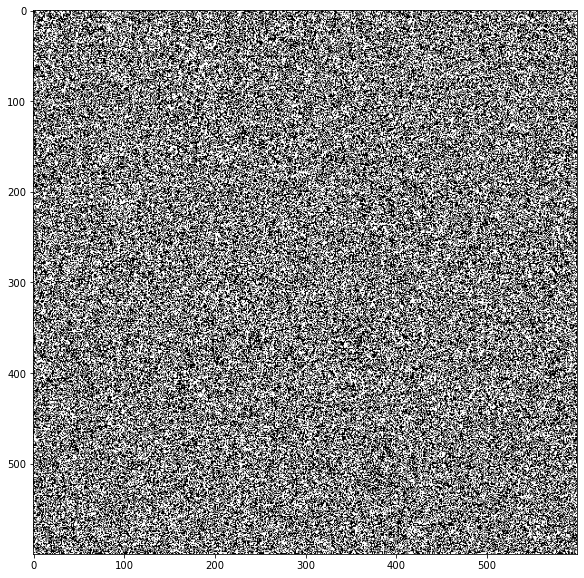

In [52]:
show_pic(white_noise)

In [53]:
noise_img = white_noise + img

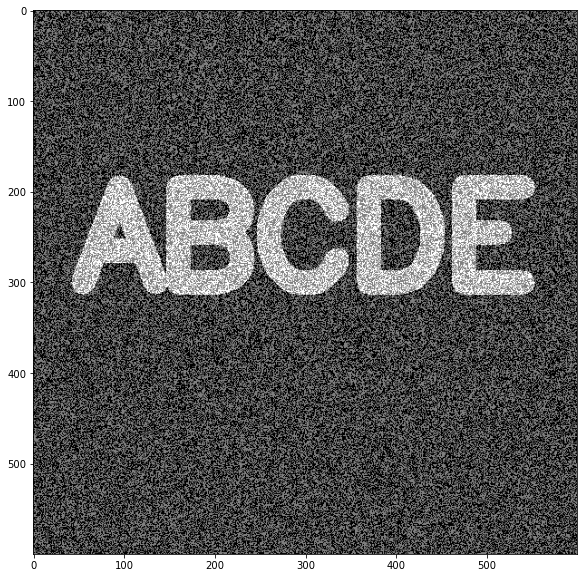

In [54]:
show_pic(noise_img)

In [55]:
#used to remove background noise, does by errosion followed by dilation
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)

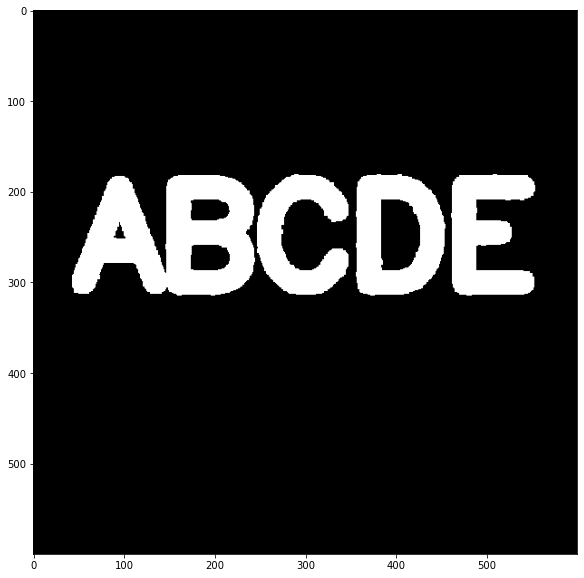

In [56]:
show_pic(opening)

In [57]:
#create black noise
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [58]:
black_noise = black_noise * -255

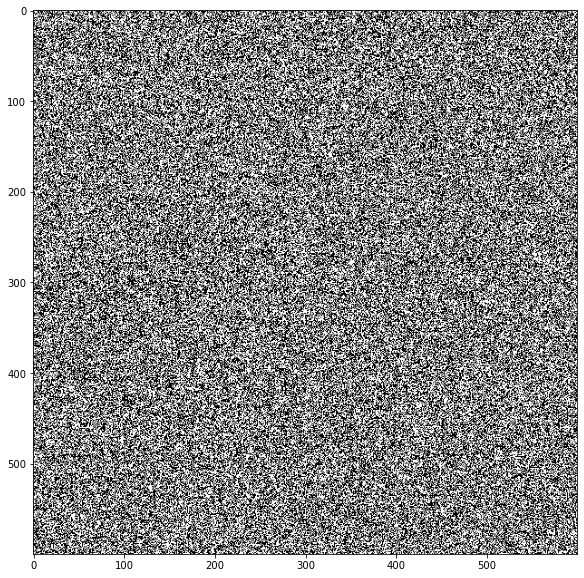

In [59]:
show_pic(black_noise)

In [60]:
black_noise_img = img + black_noise


In [62]:
black_noise_img[black_noise_img== -255] = 0

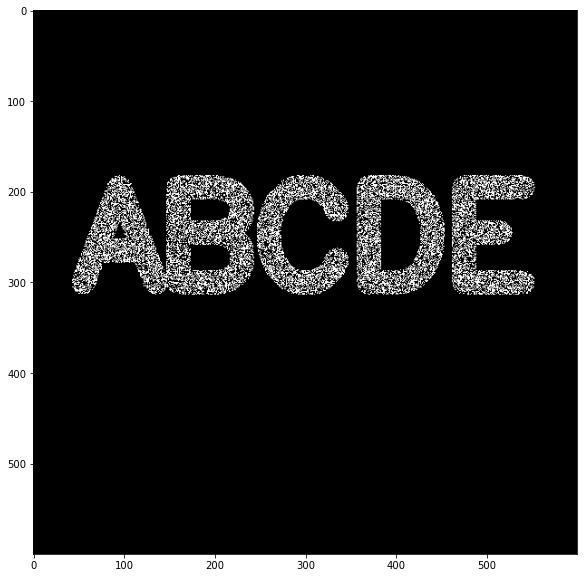

In [63]:
show_pic(black_noise_img)

In [64]:
black_noise_img.min()

0.0

In [65]:
#closing is used to get rid of noise int he foreground

closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)

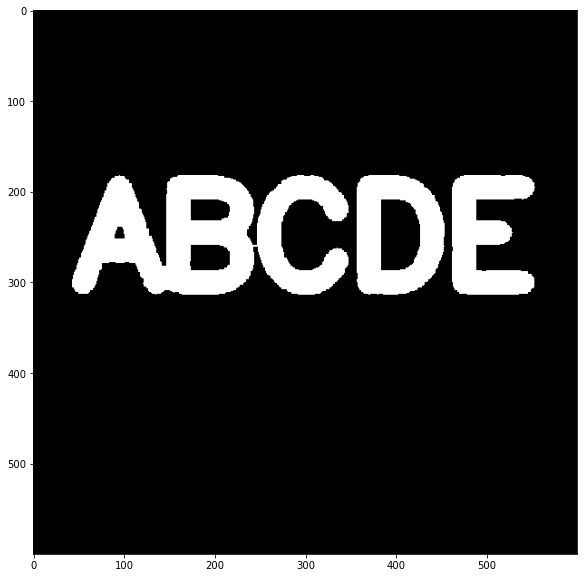

In [66]:
show_pic(closing)

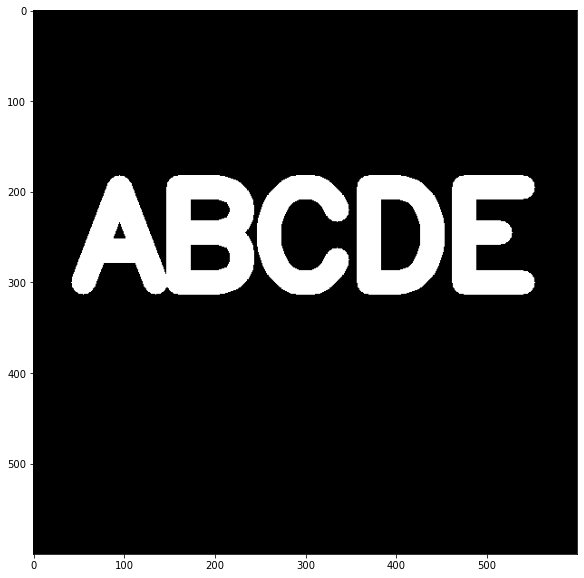

In [68]:
#morphological gradient, takes the diference between dilation and erosion of the image, this is a method of edge detection
img = load_img()
show_pic(img)

In [70]:
gradient =  cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

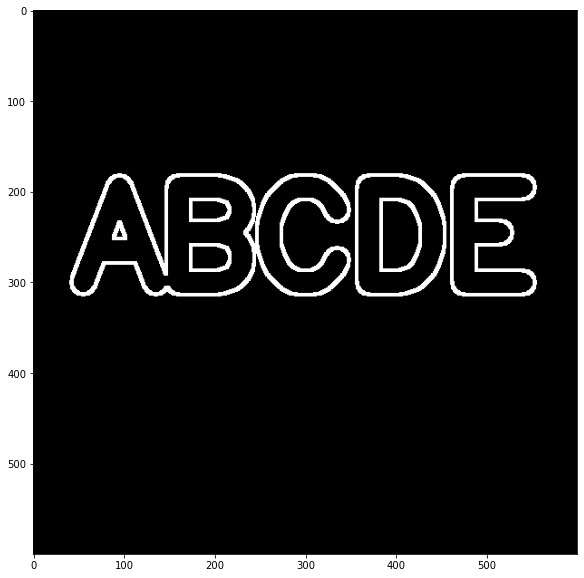

In [71]:
show_pic(gradient)